# **EDA Trip Duration** ^_^
##### by Mohamed Hossam



<a id="Data Exploration"></a>
### Data Exploration
We usually start by basic exploration

In [2]:
# import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
from matplotlib.pyplot import GridSpec



In [3]:
#load data
data_path_train=("split/train.csv")
data_path_val=("split/val.csv")
df_train=pd.read_csv(data_path_train)
df_val=pd.read_csv(data_path_val)

In [4]:
df_train.shape,df_val.shape

((1000000, 10), (229319, 10))

In [5]:
# We explore all data and split in modeling phase so we need to concat the dfs
df_data=pd.concat([df_train,df_val])

In [6]:
df_data.shape

(1229319, 10)

In [7]:
df_data.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2793718,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1040
1,id3485529,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,827
2,id1816614,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,614
3,id1050851,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,867
4,id0140657,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,4967


In [8]:
#When we reset the index, the old index is added as a column, and a new sequential index is used:
#We can use the drop parameter to avoid the old index being added as a column:
df_data.reset_index(drop=True,inplace=True)

In [9]:
df_data.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2793718,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1040
1,id3485529,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,827
2,id1816614,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,614
3,id1050851,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,867
4,id0140657,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,4967


In [10]:
df_data.head()
# dropping id column not helpful
df_data.drop(columns=['id'],axis=1,inplace=True)
df_data.columns

Index(['vendor_id', 'pickup_datetime', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'trip_duration'],
      dtype='object')

##### We have 10 features including target below a brief explanation:


    id - a unique identifier for each trip

    vendor_id - a code indicating the provider associated with the trip record

    pickup_datetime - date and time when the meter was engaged

    passenger_count - the number of passengers in the vehicle (driver entered value)

    pickup_longitude - the longitude where the meter was engaged

    pickup_latitude - the latitude where the meter was engaged

    dropoff_longitude - the longitude where the meter was disengaged

    dropoff_latitude - the latitude where the meter was disengaged

    store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle
    memory before sending to the vendor because the vehicle did not have a connection to the
    server - Y=store and forward; N=not a store and forward trip

    trip_duration - duration of the trip in seconds

In [11]:
df_data.describe().T

,count,mean,std,min,25%,50%,75%,max
vendor_id,1229319.0,1.534912,0.498780,1.000000,1.000000,2.000000,2.000000,2.000000e+00
passenger_count,1229319.0,1.664531,1.314509,0.000000,1.000000,1.000000,2.000000,8.000000e+00
pickup_longitude,1229319.0,-73.973446,0.061780,-121.933342,-73.991852,-73.981728,-73.967346,-6.133553e+01
pickup_latitude,1229319.0,40.750928,0.033545,34.359695,40.737370,40.754108,40.768360,5.188108e+01
dropoff_longitude,1229319.0,-73.973395,0.061641,-121.933304,-73.991325,-73.979759,-73.963028,-6.133553e+01
dropoff_latitude,1229319.0,40.751816,0.036341,32.181141,40.735901,40.754532,40.769821,4.392103e+01
trip_duration,1229319.0,959.691748,5263.573404,1.000000,397.000000,662.000000,1075.000000,3.526282e+06


### Insights From description
- There are 2 vendors in our dataset so what difference?
- we have 0 passenger and max 9 so we may check those values and thier range
- max trip duration is 3.52e+06 means approx 40 day so our data seems to have outliers 

In [12]:
# check of duplicates 
df_data.duplicated().sum()

6

In [13]:
#check of nulls
df_data.isna().sum().sum()

0

### Deep Analysis For  Features 

In [14]:
# Feat 1 Vendor id 
df_data["vendor_id"].describe().T,df_data["vendor_id"].value_counts()

(count    1.229319e+06
 mean     1.534912e+00
 std      4.987798e-01
 min      1.000000e+00
 25%      1.000000e+00
 50%      2.000000e+00
 75%      2.000000e+00
 max      2.000000e+00
 Name: vendor_id, dtype: float64,
 vendor_id
 2    657578
 1    571741
 Name: count, dtype: int64)

Looks like vendor 2 has more trips than number 1 i am thinking about that vendor 2 should be better so he have more trips and in our context means short trip duration ,more passengers,etc. will recall that

In [15]:
# passenger count
df_data["passenger_count"].describe().T,df_data["passenger_count"].value_counts()

(count    1.229319e+06
 mean     1.664531e+00
 std      1.314509e+00
 min      0.000000e+00
 25%      1.000000e+00
 50%      1.000000e+00
 75%      2.000000e+00
 max      8.000000e+00
 Name: passenger_count, dtype: float64,
 passenger_count
 1    871202
 2    177073
 5     65797
 3     50470
 6     40790
 4     23932
 0        51
 7         3
 8         1
 Name: count, dtype: int64)

my insights that categorial feat like vendor and 0 passengers is just an error in data cause if no passenger so no trip

In [16]:
# pickup long,lat,and dropoff long ,lat

## these feat are individually make no sense when combine them we get more helpful data like distance ,speed ,etc..

In [17]:
# store and fwd flag
df_data["store_and_fwd_flag"].describe().T,df_data["store_and_fwd_flag"].value_counts()

(count     1229319
 unique          2
 top             N
 freq      1222501
 Name: store_and_fwd_flag, dtype: object,
 store_and_fwd_flag
 N    1222501
 Y       6818
 Name: count, dtype: int64)

In [18]:
#date-time 
df_data["pickup_datetime"].describe().T,df_data["pickup_datetime"].value_counts()

(count                 1229319
 unique                1173138
 top       2016-05-07 13:18:07
 freq                        5
 Name: pickup_datetime, dtype: object,
 pickup_datetime
 2016-05-07 13:18:07    5
 2016-04-05 18:55:21    5
 2016-01-12 18:48:44    5
 2016-01-28 23:05:45    4
 2016-03-21 22:01:10    4
                       ..
 2016-04-23 18:40:35    1
 2016-05-09 08:47:57    1
 2016-04-25 19:20:24    1
 2016-04-04 12:49:52    1
 2016-02-08 19:38:00    1
 Name: count, Length: 1173138, dtype: int64)

this type of feat doesn't help so much in this format but in processing we have useful info about most trip time ,most_trip_months ,etc...

# Target Feat


In [19]:
df_data["trip_duration"].describe().T,df_data["trip_duration"].value_counts()

(count    1.229319e+06
 mean     9.596917e+02
 std      5.263573e+03
 min      1.000000e+00
 25%      3.970000e+02
 50%      6.620000e+02
 75%      1.075000e+03
 max      3.526282e+06
 Name: trip_duration, dtype: float64,
 trip_duration
 368      1357
 417      1352
 348      1349
 424      1343
 367      1340
          ... 
 5063        1
 5820        1
 4826        1
 85402       1
 4988        1
 Name: count, Length: 7147, dtype: int64)

In [20]:
# will convert it to minute to easy understand it 
trip_min=df_data["trip_duration"]/60
trip_min=pd.DataFrame(trip_min.round().astype(int))
trip_min.describe()

,trip_duration
count,1.229319e+06
mean,1.599469e+01
std,8.772701e+01
min,0.000000e+00
25%,7.000000e+00
50%,1.100000e+01
75%,1.800000e+01
max,5.877100e+04


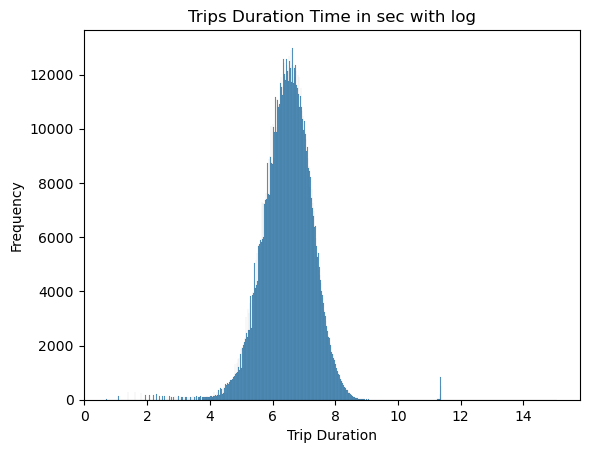

In [21]:
# we need to graph to have sense what is most durations of trips
# to have better sense we use log so we have small nums and better sense to large nums 
# if not use log you will have a skewed to left graph 
df_data["trip_duration_sec_log"]=np.log1p(df_data["trip_duration"].values)
fig=sns.histplot(df_data["trip_duration_sec_log"],label="Trip Duration")
plt.title("Trips Duration Time in sec with log")
plt.xlabel("Trip Duration")
plt.ylabel("Frequency")
plt.show()

note that we use natural logarithm that it is inverse to have seconds = exp(x)-1 like seconds of (6 in graph )= e(6)-1 
we use numpy.expm1

- from graph it seems we have some outlires on the right 
- most of trips around 2.2 min to 16.6 min 

Simply we have two types of data numerical and categorical so we will start to figure there relation ship with target and with each other

### numerical feats (Discrete)
we know that we have 2 :vendor id , passenger count but they are discrete numerical so they treated like categorical features 

In [22]:
disc_feats=["vendor_id","passenger_count"]
for feat in disc_feats:
    print("{} has {} unique value".format(feat,df_data[feat].unique()))

vendor_id has [2 1] unique value
passenger_count has [1 5 2 4 3 6 0 7 8] unique value


C:\Users\medoa\AppData\Local\Temp\ipykernel_12804\988921987.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_data,x=df_data["vendor_id"],y=df_data["trip_duration_sec_log"],palette='magma'
C:\Users\medoa\AppData\Local\Temp\ipykernel_12804\988921987.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_data,x=df_data["passenger_count"],y=df_data["trip_duration_sec_log"],palette='magma',ax=ax2)


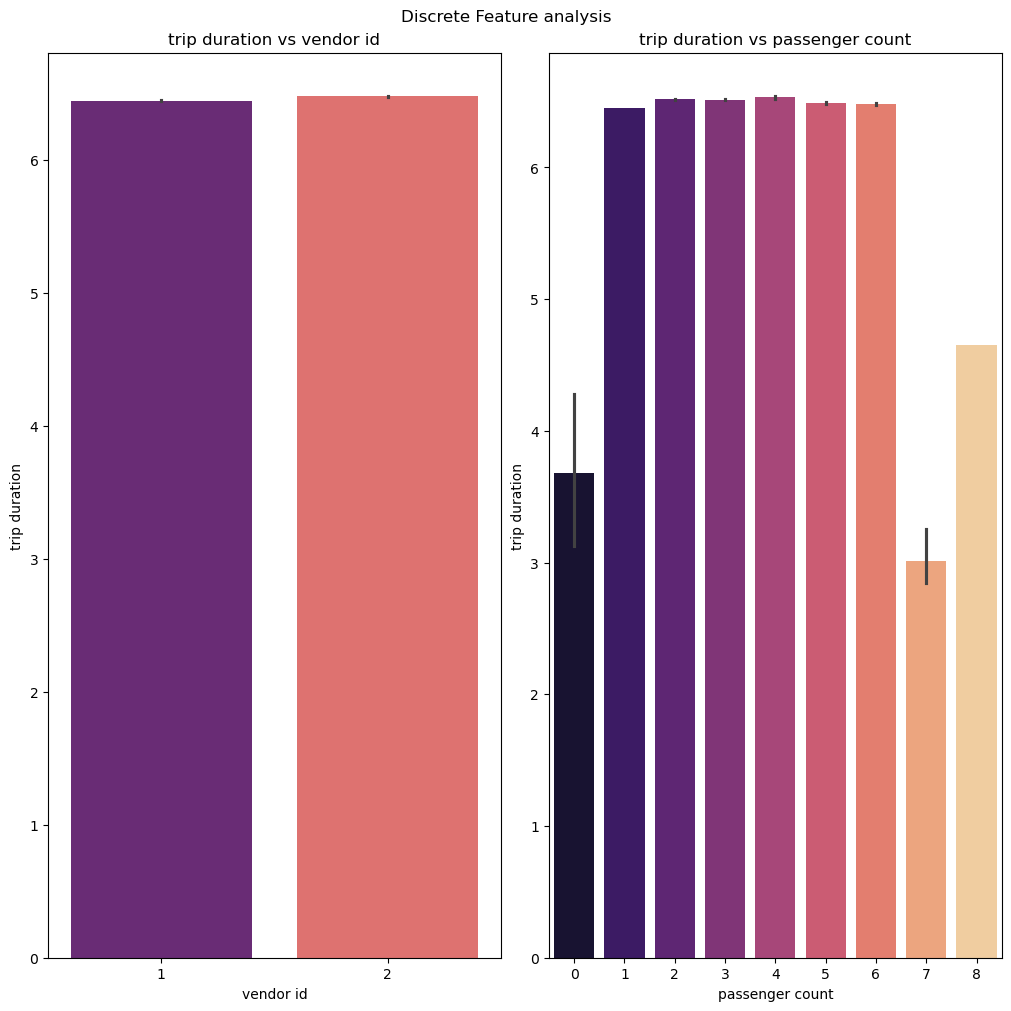

In [23]:
fig=plt.figure(constrained_layout=True,figsize=(10,10))
gs=GridSpec(1,2,fig)

#subplot1 "vendor id"
ax1=fig.add_subplot(gs[0,0])
sns.barplot(df_data,x=df_data["vendor_id"],y=df_data["trip_duration_sec_log"],palette='magma'
,ax=ax1)
ax1.set_title("trip duration vs vendor id")
ax1.set_xlabel("vendor id")
ax1.set_ylabel("trip duration")

#subplot2 "passenger count"
ax2=fig.add_subplot(gs[0,1])
sns.barplot(df_data,x=df_data["passenger_count"],y=df_data["trip_duration_sec_log"],palette='magma',ax=ax2)
ax2.set_title("trip duration vs passenger count")
ax2.set_xlabel("passenger count")
ax2.set_ylabel("trip duration")

fig.suptitle("Discrete Feature analysis")

plt.show()

- My intuition here that till now no clear patterns between trip duration and vendor id bars are relatively the same 
- from 1 to 6 it is constant trip duration from 7 to 8 take less so this might be intersting as may be the standard nums of passenger is from 1 to 6 so it is not have big effect on trip duration but may in 7 or 8 are specific trip so it might have shorter roads etc...
- so bars says for two vendors they have like same vehicles or not make a big differnce in trip duration but in first i thought one vendor is faster than other as it more prefered so i might use boxplot as will have more detailed about data noise,outlires 


C:\Users\medoa\AppData\Local\Temp\ipykernel_12804\426621048.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_data,x=df_data["vendor_id"],y=df_data["trip_duration_sec_log"],palette='magma'
C:\Users\medoa\AppData\Local\Temp\ipykernel_12804\426621048.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_data,x=df_data["passenger_count"],y=df_data["trip_duration_sec_log"],palette='magma',ax=ax2)


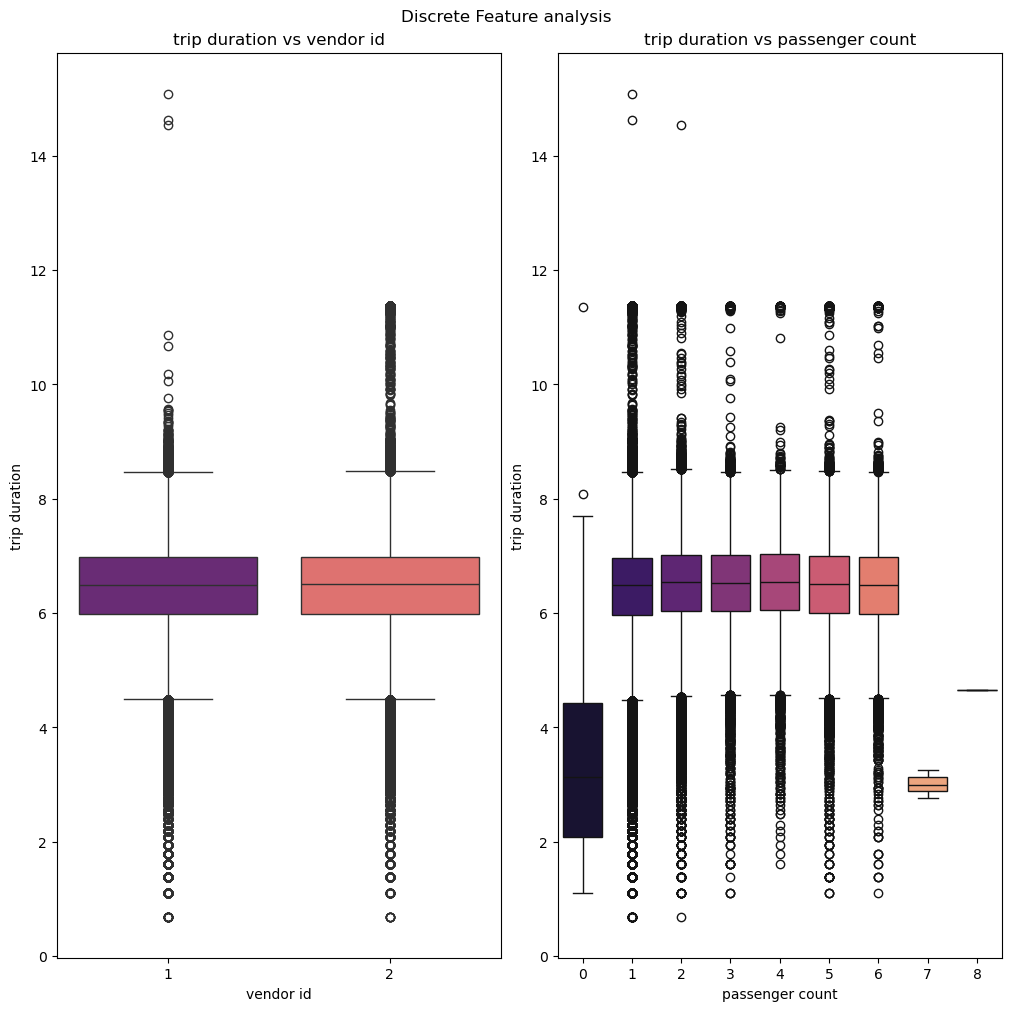

In [24]:
fig=plt.figure(constrained_layout=True,figsize=(10,10))
gs=GridSpec(1,2,fig)

#subplot1 "vendor id"
ax1=fig.add_subplot(gs[0,0])
sns.boxplot(df_data,x=df_data["vendor_id"],y=df_data["trip_duration_sec_log"],palette='magma'
,ax=ax1)
ax1.set_title("trip duration vs vendor id")
ax1.set_xlabel("vendor id")
ax1.set_ylabel("trip duration")

#subplot2 "passenger count"
ax2=fig.add_subplot(gs[0,1])
sns.boxplot(df_data,x=df_data["passenger_count"],y=df_data["trip_duration_sec_log"],palette='magma',ax=ax2)
ax2.set_title("trip duration vs passenger count")
ax2.set_xlabel("passenger count")
ax2.set_ylabel("trip duration")

fig.suptitle("Discrete Feature analysis")

plt.show()

- from this boxplot we have intution that  there are short trips more than long trips
- with higher passenger than 6 tends to be a special short trips
- we have some outlires that takes longer than thier group 

### Categorical Features


In [25]:
cat=[]
for feat in df_data.columns:
    if df_data[feat].dtype=="object":
        cat.append(feat)
print(cat)

['pickup_datetime', 'store_and_fwd_flag']


C:\Users\medoa\AppData\Local\Temp\ipykernel_12804\160841373.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_data,x=df_data["store_and_fwd_flag"],y=df_data["trip_duration_sec_log"],palette='hot'


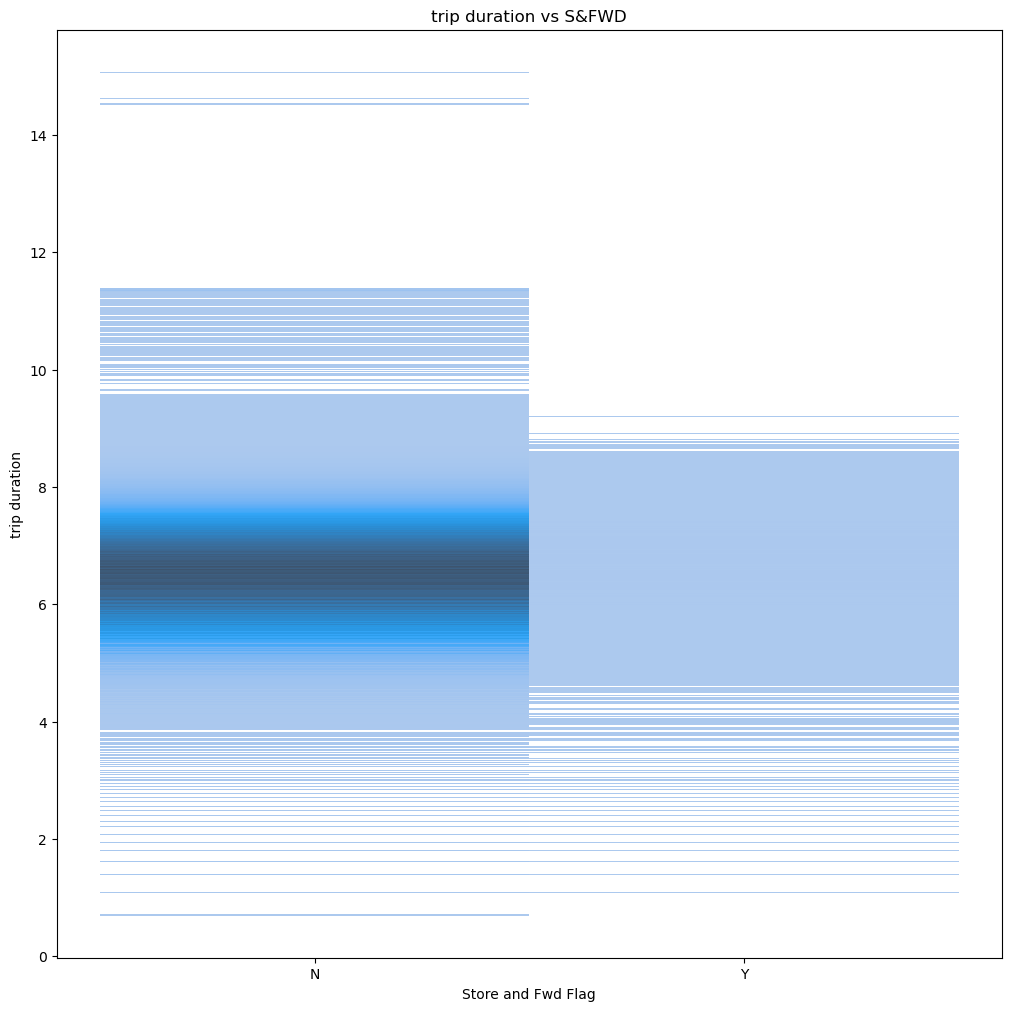

In [26]:
## Store and flag
fig=plt.figure(constrained_layout=True,figsize=(10,10))
gs=GridSpec(1,1,fig)

#subplot1 "vendor id"
ax=fig.add_subplot(gs[0,0])
sns.histplot(df_data,x=df_data["store_and_fwd_flag"],y=df_data["trip_duration_sec_log"],palette='hot'
,ax=ax)
ax.set_title("trip duration vs S&FWD")
ax.set_xlabel("Store and Fwd Flag")
ax.set_ylabel("trip duration")

plt.show()


- Most trips are sent in real time and Tend to have more duration

In [27]:
df_data.columns

Index(['vendor_id', 'pickup_datetime', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'trip_duration', 'trip_duration_sec_log'],
      dtype='object')

### Now We Start Dealing With Long,lat data as Geographical Data to have sense of what they mean and how they affect

In [28]:
# we wil first calc the distance 
from geopy import distance 


In [29]:
# separate df to calc speed and see realtions with trip duration
geo = pd.DataFrame()

def distance_(df):
    start = (df['pickup_latitude'], df['pickup_longitude'])
    end = (df['dropoff_latitude'], df['dropoff_longitude'])
    dist = distance.geodesic(start, end).km
    return dist

geo['distance'] = df_data.apply(distance_, axis=1) # get the totall distance from Latitude and longitude coordinates


C:\Users\medoa\AppData\Local\Temp\ipykernel_12804\2957285865.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=geo, x='distance', palette='hot', ax=ax)


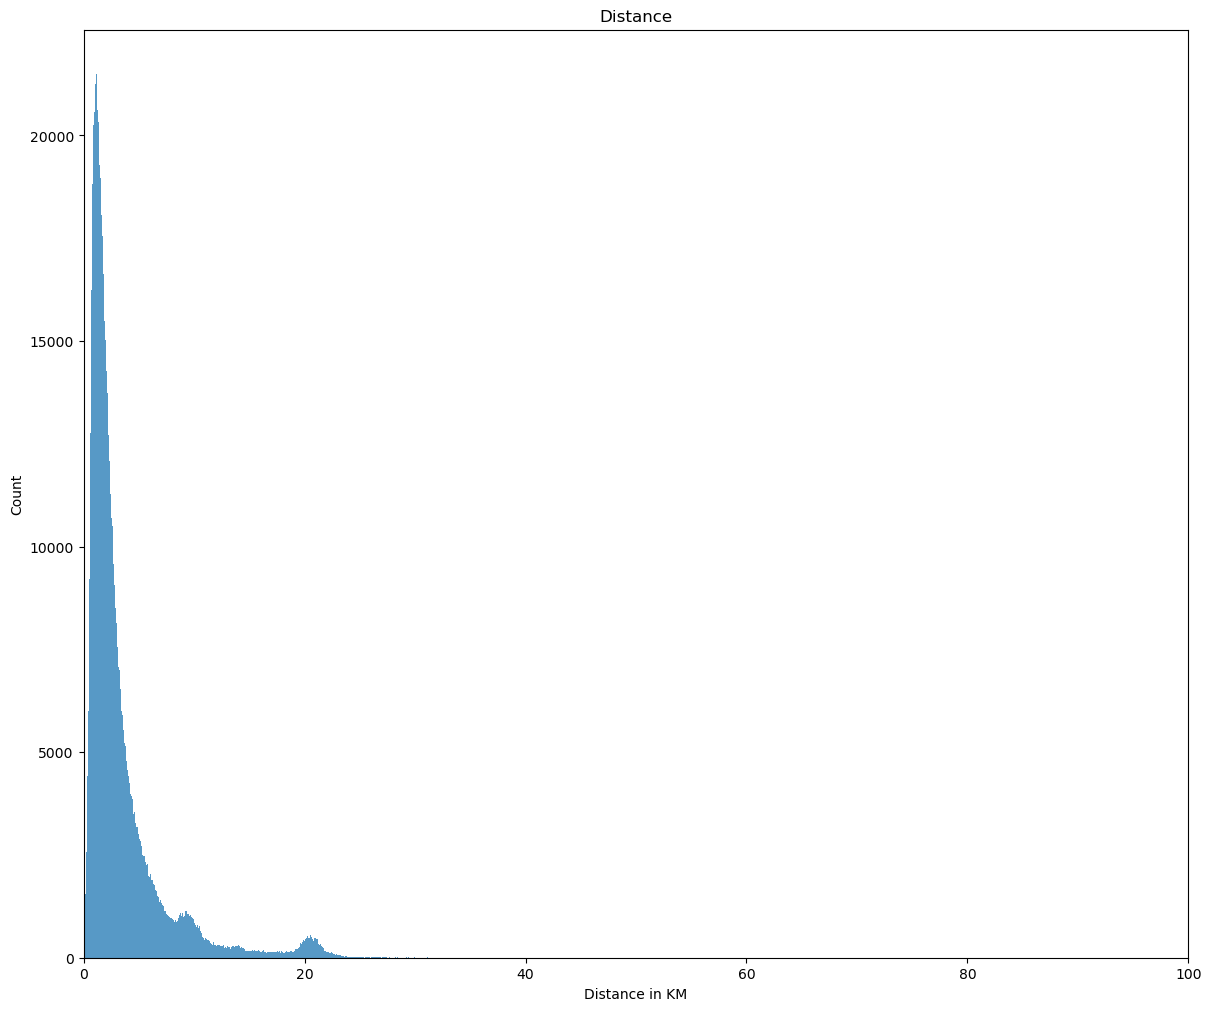

In [30]:
fig = plt.figure(constrained_layout=True, figsize=(12, 10))
gs = fig.add_gridspec(1, 1)  
ax = fig.add_subplot(gs[0, 0])  

sns.histplot(data=geo, x='distance', palette='hot', ax=ax)
ax.set_title('Distance')
ax.set_xlabel('Distance in KM')
plt.xlim(0,100)
plt.show()

Looks like Most of trips are 1km to 25 km 

In [31]:
geo["speed"]=geo["distance"]/(df_data["trip_duration"]/(3600))
#speed in kmh


C:\Users\medoa\AppData\Local\Temp\ipykernel_12804\3433489080.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(geo["speed"], palette='hot')


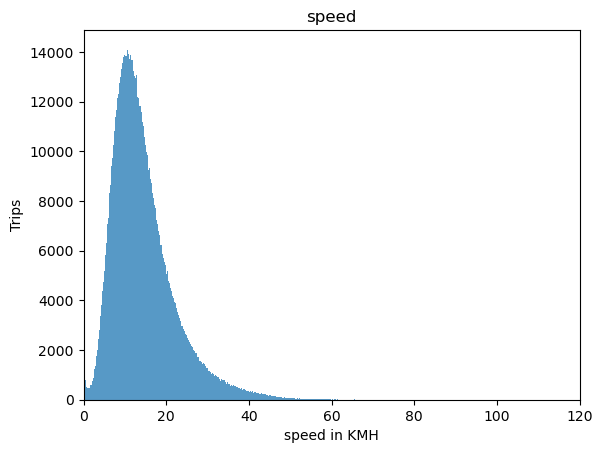

In [32]:

sns.histplot(geo["speed"], palette='hot')
plt.title('speed')
plt.xlabel('speed in KMH')
plt.ylabel("Trips")
plt.xlim(0,120)
plt.show()

- Most of trips are [1-40]km/h

### TimeDate Data

##### you can correct format and extract many info automatically


In [33]:
#pickup_datetime
df_data["pickup_datetime"]=pd.to_datetime(df_data["pickup_datetime"])
df_datime=pd.DataFrame()

df_datime["pickup_day"]=df_data["pickup_datetime"].dt.day
df_datime["pickup_month"]=df_data["pickup_datetime"].dt.month
df_datime["pickup_hour"]=df_data["pickup_datetime"].dt.hour
df_datime["pickup_dayofweek"]=df_data["pickup_datetime"].dt.dayofweek






In [34]:
# to be more clear we will modify or df to have more meaning than nums
def time_label(hour):
    if 5<=hour<12:
        return "Morning"
    elif 12<=hour<18:
        return "AfterNoon"
    else:
        return "Night"
    
df_datime["time"]=df_datime["pickup_hour"].apply(time_label)

In [35]:
days= ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df_datime["day"]=df_datime["pickup_dayofweek"].map(lambda x:days[x])
df_datime.head()


,pickup_day,pickup_month,pickup_hour,pickup_dayofweek,time,day
0,8,6,7,2,Morning,Monday
1,3,4,12,6,AfterNoon,Friday
2,5,6,2,6,Night,Friday
3,5,5,17,3,AfterNoon,Tuesday
4,12,5,17,3,AfterNoon,Tuesday


i am trying to find a relationship between time and day of weak with trip durations 

C:\Users\medoa\AppData\Local\Temp\ipykernel_12804\3837188171.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_datime,x="time",y=df_data["trip_duration_sec_log"],palette='magma',ax=ax1)
C:\Users\medoa\AppData\Local\Temp\ipykernel_12804\3837188171.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_datime,x="pickup_month",y=df_data["trip_duration_sec_log"],palette='magma',ax=ax2)
C:\Users\medoa\AppData\Local\Temp\ipykernel_12804\3837188171.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_datime,x="pickup_dayofweek",y=df_data["

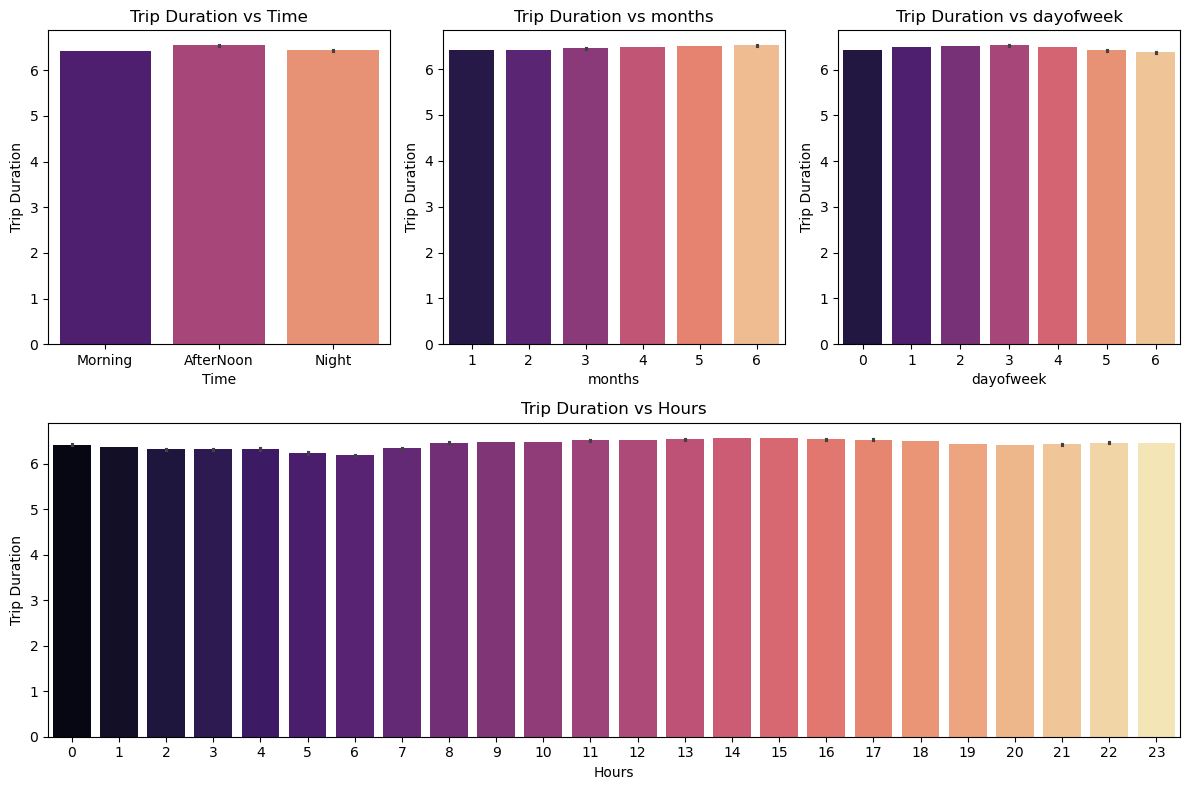

In [36]:
fig=plt.figure(constrained_layout=True,figsize=(12,8))
gs=fig.add_gridspec(2,3)
# for time in single day
ax1=fig.add_subplot(gs[0,0])
sns.barplot(df_datime,x="time",y=df_data["trip_duration_sec_log"],palette='magma',ax=ax1)
ax1.set_title("Trip Duration vs Time")
ax1.set_xlabel("Time")
ax1.set_ylabel("Trip Duration")
# for duration vs months
ax2=fig.add_subplot(gs[0,1])
sns.barplot(df_datime,x="pickup_month",y=df_data["trip_duration_sec_log"],palette='magma',ax=ax2)
ax2.set_title("Trip Duration vs months")
ax2.set_xlabel("months")
ax2.set_ylabel("Trip Duration")
# for duration vs day of week
ax3=fig.add_subplot(gs[0,2])
sns.barplot(df_datime,x="pickup_dayofweek",y=df_data["trip_duration_sec_log"],palette='magma',ax=ax3)
ax3.set_title("Trip Duration vs dayofweek")
ax3.set_xlabel("dayofweek")
ax3.set_ylabel("Trip Duration")
# for duration vs hours
ax4=fig.add_subplot(gs[1,:])
sns.barplot(df_datime,x="pickup_hour",y=df_data["trip_duration_sec_log"],palette='magma',ax=ax4)
ax4.set_title("Trip Duration vs Hours")
ax4.set_xlabel("Hours")
ax4.set_ylabel("Trip Duration")
plt.tight_layout()
plt.show()




- looks like most trip durations are afternoon and this okay as it is normal in this time "Crowd"
- months of 4,5,6 have longer duration may be to the start of summer ,traveling in these months
- duration takes longer on rush hours and this might be of the fact that is middle of day most people are out doing different activites
- short duration during evening and morning due to fact people adre just making purpose trips 

Correlation Analysis

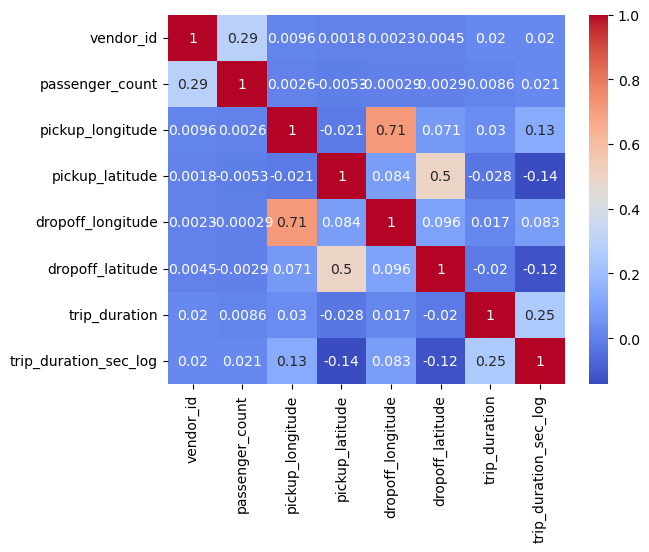

In [37]:
#dropp off categorial feats first
correlation=df_data.drop(cat,axis=1,inplace=False).corr()
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.show()

- There is posstive relation trip duration with pickup longitude ,dropoff longitude and passenger count.

- There negative relation trip duration with pickup latitude and dropoff latitude.
- no huge relation

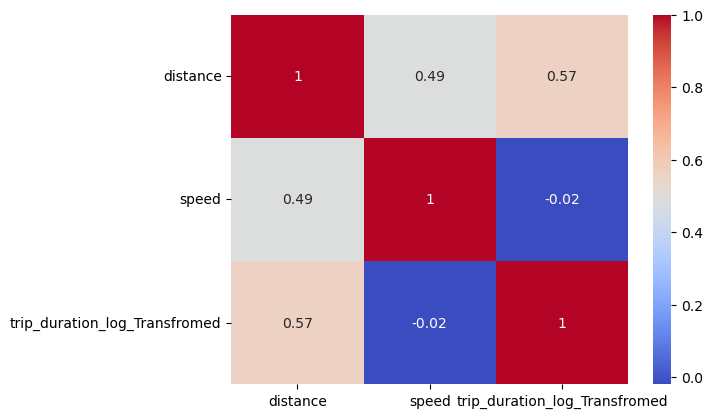

In [38]:
geo["trip_duration_log_Transfromed"]=df_data["trip_duration_sec_log"]
correlation=geo.corr()
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.show()

- There is a strong posstive relation between trip duration and distance.

- There is  negative relation between trip duration and speed kmh.
- I think we Can make use of distance feat in modeling 